#Lab Assignment 1 - Group 33

- Aditya Vidyadhar Kamath (2020H1030073G)

- Shikhar Vashishtha (2020H1030050G)

Contributions: 

**Aditya Vidyadhar Kamath: **

Comparing the performance of MLPs with skip connections to those without skip connections.

Attempted to explain, through an experiment of your own, why Skip Con-
nections help or hurt.


**Shikhar Vashishtha: **

Analysed multiple different types of skip connections [2 of them] and compare their performance.

Performed experiments over different characteristics of skip connections [We skipped 1,4 respectively]

          

In [1]:
import os #For paths
import matplotlib.pyplot as plt #Plotting/Visualising graphs
import torch.nn.functional as F  
import torchvision
import torchvision.transforms as transforms #transforming image datatset
from torch import nn #making model
import torch


# CIFAR Dataset

We used **CIFAR** Dataset for assignment 1 - this dataset contains sixty thousand 32x32 size coloured images. There are ten classes in it. there are approx six thousand images per class. 
We use 83% of dataset for training and 17% for testing which is approximately fifty thousand and ten thousand data rows respectively. 

The workflow is: 
1: Compare the performance of MLPs with skip connections to those without skip
connections.

2: Analyse multiple different types of skip connections (at least 2) and compare their performance.

3: 2 types of skips connections for studies

4: an experiment of your own, why Skip Con-nections help or hurt.

In [2]:
batch_size = 64 #64 rows per batch

Func_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=Func_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

#traindataset

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=Func_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

#testdataset

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# training loop
def train_loop(loader_of_data, model, loss_func_name, optimizer):
    loss_of_epoch = [] #keeping the epoch losses
    size = len(loader_of_data.dataset) #size of dataset
    for batch, (X, y) in enumerate(loader_of_data): #for every batch in the dataloader do
        op = model(X) #Predict
        oneloss = loss_func_name(op, y) #COmpute loss
        loss_of_epoch.append(oneloss) #Append Loss
        optimizer.zero_grad() #initialise with 0 gradiant i.e. all grads = 0
        oneloss.backward() #Start Backward propagation
        optimizer.step() #optimise

        if batch % 100 == 0: #if batch size is complete print
            oneloss, curr_batch = oneloss.item(), batch * len(X)
            print(f"Training loss = {oneloss:>7f}  [{curr_batch:>5d}/{size:>5d}]")
    return sum(loss_of_epoch)/len(loss_of_epoch)



In [4]:
#test loop
def test_loop(loader_of_data, model, loss_func_name):
    size = len(loader_of_data.dataset) #size of data
    batch_num = len(loader_of_data) #num of data
    test_loss = 0 #initialise loss
    correct = 0 #initialise corr

    with torch.no_grad(): 
        for X, y in loader_of_data:
            pred = model(X)
            test_loss = test_loss + loss_func_name(pred, y).item()
            correct = correct + (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss = test_loss/batch_num
    correct = correct/size
    print(f"Testing set: \n Accuracy: {(100*correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
    return test_loss, correct

In [5]:
# training function
def train_network(model, epochs, loss_fn, optimizer, array_of_training_loss, array_test_loss, array_test_acc):

  for k in range(epochs):
    print(f"Epoch {k+1}\n")
    loss_epoch = train_loop(trainloader, model, loss_fn, optimizer)
    test_loss, correct = test_loop(testloader, model, loss_fn)
    array_of_training_loss.append(loss_epoch)
    array_test_acc.append(correct)
    array_test_loss.append(test_loss)

  return array_of_training_loss, array_test_loss, array_test_acc

In [6]:
#plotting graphs
def model_plot(epochs, array_of_training_loss, array_test_loss, array_test_acc):
  fig, ax = plt.subplots(1, 2)
  # fig.title("Accuracy and Loss statistics")
  ax[0].plot(array_of_training_loss, label = "Training Loss")
  ax[0].plot(array_test_loss, label = "Testing Loss")
  ax[0].legend(["Training Loss", "Testing Loss"], loc = "best")
  ax[0].set_xticks(range(0,epochs))
  ax[0].set_xlabel("Epoch number")
  ax[0].set_ylabel("Output of Loss Function")
  
  ax[1].plot(array_test_acc, label = "Testing Accuracy")
  ax[1].set_xticks(range(0,epochs))
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Accuracy")

  fig.tight_layout()
  fig.tight_layout(rect=[0, 0.11, 1.75, 1.05])
  plt.show()

# Deep Neural networks - Without skip connections
In this we do comparisions of various skip connections for task 1 and task 2 of the assignment

Analyse multiple different types of skip connections (at least 2) and compare their
performance. We start off without skip connections. we use  12 layers


In [7]:
class DeepNeuralNetwork(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 512)
        self.fc7 = nn.Linear(512, 512)
        self.fc8 = nn.Linear(512, 512)
        self.fc9 = nn.Linear(512, 512)
        self.fc10 = nn.Linear(512, 512)
        self.fc11 = nn.Linear(512, 512)
        self.fc12 = nn.Linear(512, 256)
        self.fc13 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x))
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        logits = self.fc13(x)
        return logits

In [8]:
model = DeepNeuralNetwork(3*32*32)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
print(model)
array_test_loss = [] #test_loss_array
array_of_training_loss = [] #training_loss_array
array_test_acc = [] #test_acc_array
epochs = 20

DeepNeuralNetwork(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=512, bias=True)
  (fc11): Linear(in_features=512, out_features=512, bias=True)
  (fc12): Linear(in_features=512, out_features=256, bias=True)
  (fc13): Linear(in_features=256, out_features=10, bias=True)
)


In [9]:
array_of_training_loss, array_test_loss, array_test_acc = train_network(model, epochs, loss_fn, optimizer, array_of_training_loss, array_test_loss, array_test_acc)

Epoch 1

Training loss = 2.302986  [    0/50000]
Training loss = 2.299762  [ 6400/50000]
Training loss = 2.306077  [12800/50000]
Training loss = 2.303834  [19200/50000]
Training loss = 2.299130  [25600/50000]
Training loss = 2.298871  [32000/50000]
Training loss = 2.303604  [38400/50000]
Training loss = 2.302991  [44800/50000]
Testing set: 
 Accuracy: 10.0%, Average loss: 2.302652 

Epoch 2

Training loss = 2.299826  [    0/50000]
Training loss = 2.303724  [ 6400/50000]
Training loss = 2.304347  [12800/50000]
Training loss = 2.301927  [19200/50000]
Training loss = 2.302622  [25600/50000]
Training loss = 2.301614  [32000/50000]
Training loss = 2.302097  [38400/50000]
Training loss = 2.303844  [44800/50000]
Testing set: 
 Accuracy: 10.0%, Average loss: 2.302604 

Epoch 3

Training loss = 2.302337  [    0/50000]
Training loss = 2.301428  [ 6400/50000]
Training loss = 2.301888  [12800/50000]
Training loss = 2.303452  [19200/50000]
Training loss = 2.302744  [25600/50000]
Training loss = 2.3

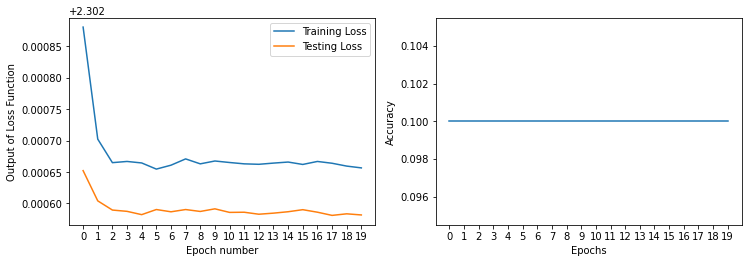

In [10]:
model_plot(epochs, array_of_training_loss, array_test_loss, array_test_acc)

Vanishing gradients is a huge problem and thus clearly from the figure above model fails after 10% accuracy and 20 epochs. 


# Skip Connections in above deep networks- Type 1
Here four skip connections in the above neural network architecture are added. In this type of skip connection, a block to second next block skip is done between consequitive layers.

In [11]:
class SkipConnectedDeepNeuralNetwork(nn.Module): #Type 1 Skip 1
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 512)
        self.fc7 = nn.Linear(512, 512)
        self.fc8 = nn.Linear(512, 512)
        self.fc9 = nn.Linear(512, 512)
        self.fc10 = nn.Linear(512, 512)
        self.fc11 = nn.Linear(512, 512)
        self.fc12 = nn.Linear(512, 256)
        self.fc13 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        state_x1 = x
        x = F.relu(self.fc3(x) + state_x1)
        x = F.relu(self.fc4(x))
        state_x2 = x
        x = F.relu(self.fc5(x) + state_x2)
        x = F.relu(self.fc6(x))
        x3 = x
        x = F.relu(self.fc7(x) + x3)
        x = F.relu(self.fc8(x))
        state_x4 = x
        x = F.relu(self.fc9(x) + state_x4)
        x = F.relu(self.fc10(x))
        state_x5 = x
        x = F.relu(self.fc11(x) + state_x5)
        x = F.relu(self.fc12(x))
        logits = self.fc13(x)
        return logits

In [12]:
model2 = SkipConnectedDeepNeuralNetwork(3*32*32)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate, momentum=0.9)
print(model2)
array_test_loss2 = [] #test_loss_array
array_of_training_loss2 = [] #training_loss_array
array_test_acc2 = [] #test_acc_array
epochs = 20

SkipConnectedDeepNeuralNetwork(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=512, bias=True)
  (fc11): Linear(in_features=512, out_features=512, bias=True)
  (fc12): Linear(in_features=512, out_features=256, bias=True)
  (fc13): Linear(in_features=256, out_features=10, bias=True)
)


In [13]:
array_of_training_loss2, array_test_loss2, array_test_acc2 = train_network(model2, epochs, loss_fn, optimizer, array_of_training_loss2, array_test_loss2, array_test_acc2)

Epoch 1

Training loss = 2.299520  [    0/50000]
Training loss = 2.309938  [ 6400/50000]
Training loss = 2.305059  [12800/50000]
Training loss = 2.299271  [19200/50000]
Training loss = 2.305028  [25600/50000]
Training loss = 2.303709  [32000/50000]
Training loss = 2.303592  [38400/50000]
Training loss = 2.302028  [44800/50000]
Testing set: 
 Accuracy: 10.7%, Average loss: 2.302552 

Epoch 2

Training loss = 2.302916  [    0/50000]
Training loss = 2.300153  [ 6400/50000]
Training loss = 2.302627  [12800/50000]
Training loss = 2.300591  [19200/50000]
Training loss = 2.302907  [25600/50000]
Training loss = 2.302115  [32000/50000]
Training loss = 2.303617  [38400/50000]
Training loss = 2.303131  [44800/50000]
Testing set: 
 Accuracy: 10.2%, Average loss: 2.302385 

Epoch 3

Training loss = 2.302556  [    0/50000]
Training loss = 2.303113  [ 6400/50000]
Training loss = 2.302101  [12800/50000]
Training loss = 2.303255  [19200/50000]
Training loss = 2.301641  [25600/50000]
Training loss = 2.3

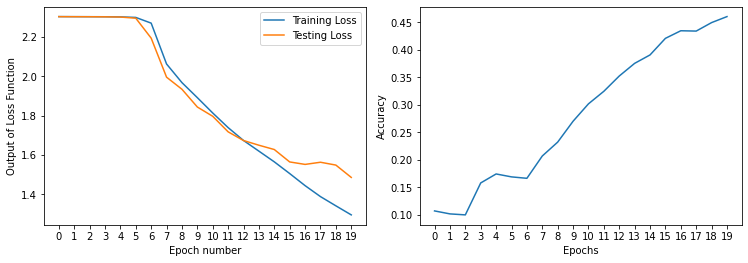

In [14]:
model_plot(epochs, array_of_training_loss2, array_test_loss2, array_test_acc2)

From this we understand that with skip connection the gradiants are able to reach the minimum error state faster as the error information will be backpropagated from a previous layer itself and later by the immediate layer. This is the advantage with the skip connection that convergence will happen fast

# Skip Connections in deep network - Type 2
In this type of skip connections more than one block of neurons/hidden layers are skipped. In our case we skip 3 layers to analyse - which are skipped twice


In [15]:
class SkipConnectedDeepNeuralNetwork2(nn.Module): #skip 4 layers
    def __init__(self, input_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, 512)
        self.fc6 = nn.Linear(512, 512)
        self.fc7 = nn.Linear(512, 512)
        self.fc8 = nn.Linear(512, 512)
        self.fc9 = nn.Linear(512, 512)
        self.fc10 = nn.Linear(512, 512)
        self.fc11 = nn.Linear(512, 512)
        self.fc12 = nn.Linear(512, 256)
        self.fc13 = nn.Linear(256, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        state_x1 = x
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x) + state_x1)
        state_x2 = x
        x = F.relu(self.fc8(x))
        x = F.relu(self.fc9(x))
        x = F.relu(self.fc10(x) + state_x2)
        x = F.relu(self.fc11(x))
        x = F.relu(self.fc12(x))
        logits = self.fc13(x)
        return logits

In [16]:
model3 = SkipConnectedDeepNeuralNetwork2(3*32*32)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model3.parameters(), lr=learning_rate, momentum=0.9)
print(model3)
array_test_loss3 = [] #test_loss_array
array_of_training_loss3 = [] #training_loss_array
array_test_acc3 = [] #test_acc_array
epochs = 20

SkipConnectedDeepNeuralNetwork2(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=512, bias=True)
  (fc11): Linear(in_features=512, out_features=512, bias=True)
  (fc12): Linear(in_features=512, out_features=256, bias=True)
  (fc13): Linear(in_features=256, out_features=10, bias=True)
)


In [17]:
array_of_training_loss3, array_test_loss3, array_test_acc3 = train_network(model3, epochs, loss_fn, optimizer, array_of_training_loss3, array_test_loss3, array_test_acc3)

Epoch 1

Training loss = 2.295099  [    0/50000]
Training loss = 2.300504  [ 6400/50000]
Training loss = 2.309347  [12800/50000]
Training loss = 2.305970  [19200/50000]
Training loss = 2.302086  [25600/50000]
Training loss = 2.304154  [32000/50000]
Training loss = 2.306078  [38400/50000]
Training loss = 2.305639  [44800/50000]
Testing set: 
 Accuracy: 10.0%, Average loss: 2.302104 

Epoch 2

Training loss = 2.299660  [    0/50000]
Training loss = 2.302287  [ 6400/50000]
Training loss = 2.302057  [12800/50000]
Training loss = 2.302258  [19200/50000]
Training loss = 2.301612  [25600/50000]
Training loss = 2.301170  [32000/50000]
Training loss = 2.300668  [38400/50000]
Training loss = 2.301746  [44800/50000]
Testing set: 
 Accuracy: 11.0%, Average loss: 2.301302 

Epoch 3

Training loss = 2.302143  [    0/50000]
Training loss = 2.301451  [ 6400/50000]
Training loss = 2.300583  [12800/50000]
Training loss = 2.301891  [19200/50000]
Training loss = 2.299002  [25600/50000]
Training loss = 2.2

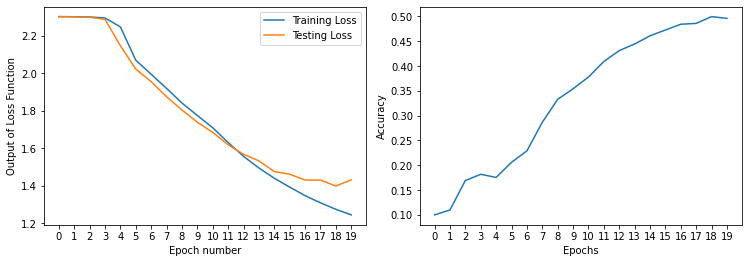

In [18]:
model_plot(epochs, array_of_training_loss3, array_test_loss3, array_test_acc3)

# Skip connections - Type 3 - Dense Skip Connections 
In this type the first 3 hidden layers are skipped.

As a part of task3 and task4 we want to do this


In [19]:
class SkipConnectedDeepNeuralNetwork3(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 512)
    self.fc2 = nn.Linear(512, 512)
    self.fc3 = nn.Linear(512, 512)
    self.fc4 = nn.Linear(512, 512)
    self.fc5 = nn.Linear(512, 10)

  def forward(self, x):
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    state_x1 = x
    x = F.relu(self.fc2(x) + state_x1)
    state_x2 = x
    x = F.relu(self.fc3(x) + state_x1 + state_x2)
    x3 = x
    x = F.relu(self.fc4(x) + state_x1 + state_x2 + x3)
    logits = self.fc5(x)
    return logits

In [20]:
model4 = SkipConnectedDeepNeuralNetwork3(3*32*32)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model4.parameters(), lr=learning_rate, momentum=0.9)
print(model4)
array_test_loss4 = [] #test_loss_array
array_of_training_loss4 = [] #training_loss_array
array_test_acc4 = [] #test_acc_array
epochs = 20

SkipConnectedDeepNeuralNetwork3(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=10, bias=True)
)


In [21]:
array_of_training_loss4, array_test_loss4, array_test_acc4 = train_network(model4, epochs, loss_fn, optimizer, array_of_training_loss4, array_test_loss4, array_test_acc4)

Epoch 1

Training loss = 2.387828  [    0/50000]
Training loss = 1.859822  [ 6400/50000]
Training loss = 1.612996  [12800/50000]
Training loss = 1.714724  [19200/50000]
Training loss = 1.726463  [25600/50000]
Training loss = 1.784810  [32000/50000]
Training loss = 1.614073  [38400/50000]
Training loss = 1.607737  [44800/50000]
Testing set: 
 Accuracy: 47.3%, Average loss: 1.509198 

Epoch 2

Training loss = 1.645671  [    0/50000]
Training loss = 1.531911  [ 6400/50000]
Training loss = 1.291476  [12800/50000]
Training loss = 1.469710  [19200/50000]
Training loss = 1.439126  [25600/50000]
Training loss = 1.373002  [32000/50000]
Training loss = 1.359657  [38400/50000]
Training loss = 1.595039  [44800/50000]
Testing set: 
 Accuracy: 50.2%, Average loss: 1.429362 

Epoch 3

Training loss = 1.147420  [    0/50000]
Training loss = 1.423646  [ 6400/50000]
Training loss = 1.550458  [12800/50000]
Training loss = 1.290209  [19200/50000]
Training loss = 1.213140  [25600/50000]
Training loss = 1.5

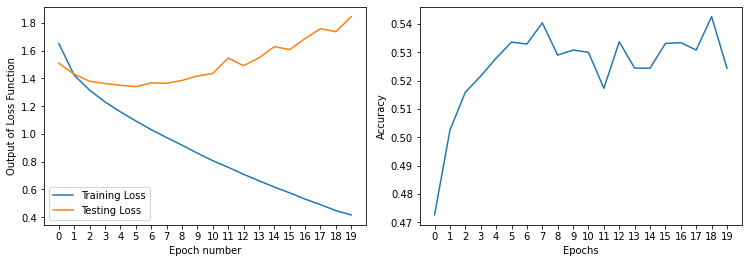

In [22]:
model_plot(epochs, array_of_training_loss4, array_test_loss4, array_test_acc4)

# Comparison of test accuracy without and with skip connections in a deep neural network.

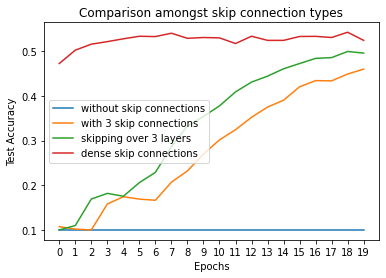

In [23]:
plt.plot(array_test_acc, label = "Test Accuracy without skip connections")
plt.plot(array_test_acc2, label = "Test Accuracy with 3 skip connections")
plt.plot(array_test_acc3, label = "Test Accuracy with two 3-layer skip connections")
plt.plot(array_test_acc4, label = "Test Accuracy with dense skip connections")
plt.xticks(range(0,20))
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Comparison amongst skip connection types")
plt.legend(["without skip connections", "with 3 skip connections", "skipping over 3 layers", "dense skip connections"], loc ="best")

Our conclusions are straightforward from our results: 

1: Skip Connections help solve vanishing gradient issue

2: Skip connections can reach optimal accuracy faster as in the backpropagation processs errors are passed back faster

3: An optimal number of hidden layers must be skipped and need not be always 1 or n. However in this case a dense one seems to work

When will it hurt?? 

Well we have a feeling that when the data is noisy skip connections are bad to use. I cannot demonstrate noise using this dataset but can visualise what might happen along with the skip connections. 

**Overall skip connections are agathokakological**, though we are panglossian about the same. 

# MNIST Dataset

The MNIST dataset is a dataset of 60k square approx 28×28 pixel grayscale images of handwritten single digits between 0 and 9.





The workflow is: 
1: Compare the performance of MLPs with skip connections to those without skip
connections.

2: Analyse multiple different types of skip connections (at least 2) and compare their performance.

3: 2 types of skips connections for studies

4: an experiment of your own, why Skip Con-nections help or hurt

In [24]:
transform_func = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

batch_size = 64

classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform_func)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform_func)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Deep neural network with more hidden layers with no skip connections


In [25]:
model_mn = DeepNeuralNetwork(784)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_mn.parameters(), lr=learning_rate, momentum=0.9)
array_test_loss_mn = [] #test_loss_array
array_of_training_loss_mn = [] #training_loss_array
array_test_acc_mn = [] #test_acc_array
epochs = 10
print(model_mn)

DeepNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=512, bias=True)
  (fc11): Linear(in_features=512, out_features=512, bias=True)
  (fc12): Linear(in_features=512, out_features=256, bias=True)
  (fc13): Linear(in_features=256, out_features=10, bias=True)
)


In [26]:
array_of_training_loss_mn, array_test_loss_mn, array_test_acc_mn = train_network(model_mn, epochs, loss_fn, optimizer, array_of_training_loss_mn, array_test_loss_mn, array_test_acc_mn)

Epoch 1

Training loss = 2.299674  [    0/60000]
Training loss = 2.309362  [ 6400/60000]
Training loss = 2.299179  [12800/60000]
Training loss = 2.301494  [19200/60000]
Training loss = 2.301336  [25600/60000]
Training loss = 2.300165  [32000/60000]
Training loss = 2.295356  [38400/60000]
Training loss = 2.298548  [44800/60000]
Training loss = 2.305578  [51200/60000]
Training loss = 2.304968  [57600/60000]
Testing set: 
 Accuracy: 11.3%, Average loss: 2.301254 

Epoch 2

Training loss = 2.300365  [    0/60000]
Training loss = 2.307890  [ 6400/60000]
Training loss = 2.303066  [12800/60000]
Training loss = 2.305721  [19200/60000]
Training loss = 2.298708  [25600/60000]
Training loss = 2.306019  [32000/60000]
Training loss = 2.305004  [38400/60000]
Training loss = 2.288624  [44800/60000]
Training loss = 2.301292  [51200/60000]
Training loss = 2.297018  [57600/60000]
Testing set: 
 Accuracy: 11.3%, Average loss: 2.301063 

Epoch 3

Training loss = 2.298100  [    0/60000]
Training loss = 2.2

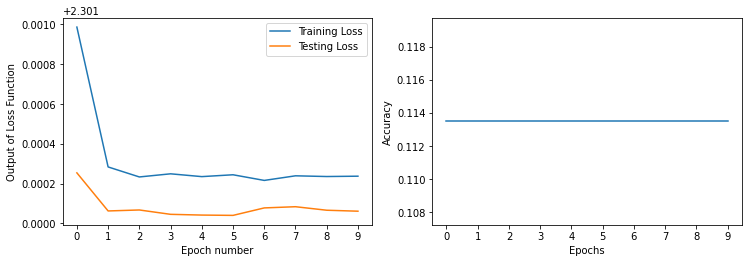

In [27]:
model_plot(epochs, array_of_training_loss_mn, array_test_loss_mn, array_test_acc_mn)

As illustrated in the results, the deep neural network fails to perform well and reaches an accuracy of 25.7% after 10 epochs. This is due to the problem of vanishing gradients.

# Skip Connections in the neural network - Type 1
One block is skipped. Three skip connections added




In [28]:
model_mn2 = SkipConnectedDeepNeuralNetwork(784)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_mn2.parameters(), lr=learning_rate, momentum=0.9)
array_test_loss_mn2 = [] #test_loss_array
array_of_training_loss_mn2 = [] #training_loss_array
array_test_acc_mn2 = [] #test_acc_array
epochs = 10
print(model_mn2)

SkipConnectedDeepNeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=512, bias=True)
  (fc11): Linear(in_features=512, out_features=512, bias=True)
  (fc12): Linear(in_features=512, out_features=256, bias=True)
  (fc13): Linear(in_features=256, out_features=10, bias=True)
)


In [29]:
array_of_training_loss_mn2, array_test_loss_mn2, array_test_acc_mn2 = train_network(model_mn2, epochs, loss_fn, optimizer, array_of_training_loss_mn2, array_test_loss_mn2, array_test_acc_mn2)

Epoch 1

Training loss = 2.302839  [    0/60000]
Training loss = 2.299435  [ 6400/60000]
Training loss = 2.302455  [12800/60000]
Training loss = 2.293200  [19200/60000]
Training loss = 2.306236  [25600/60000]
Training loss = 2.302919  [32000/60000]
Training loss = 2.302520  [38400/60000]
Training loss = 2.295156  [44800/60000]
Training loss = 2.296867  [51200/60000]
Training loss = 2.292331  [57600/60000]
Testing set: 
 Accuracy: 11.3%, Average loss: 2.300487 

Epoch 2

Training loss = 2.299217  [    0/60000]
Training loss = 2.300102  [ 6400/60000]
Training loss = 2.302368  [12800/60000]
Training loss = 2.292999  [19200/60000]
Training loss = 2.296248  [25600/60000]
Training loss = 2.293292  [32000/60000]
Training loss = 2.309943  [38400/60000]
Training loss = 2.305462  [44800/60000]
Training loss = 2.298258  [51200/60000]
Training loss = 2.298602  [57600/60000]
Testing set: 
 Accuracy: 11.3%, Average loss: 2.298307 

Epoch 3

Training loss = 2.293808  [    0/60000]
Training loss = 2.2

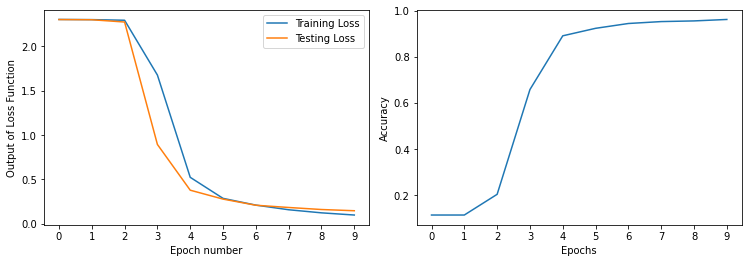

In [30]:
model_plot(epochs, array_of_training_loss_mn2, array_test_loss_mn2, array_test_acc_mn2)

# Skip Connections in deep network - Type 2
In this type of skip connections more than one block of neurons/hidden layers are skipped. In our case we skip 3 layers to analyse - which are skipped twice


In [31]:
model_mn3 = SkipConnectedDeepNeuralNetwork2(784)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_mn3.parameters(), lr=learning_rate, momentum=0.9)
array_test_loss_mn3 = [] #test_loss_array
array_of_training_loss_mn3 = [] #training_loss_array
array_test_acc_mn3 = [] #test_acc_array
epochs = 10
print(model_mn3)

SkipConnectedDeepNeuralNetwork2(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=512, bias=True)
  (fc6): Linear(in_features=512, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=512, bias=True)
  (fc9): Linear(in_features=512, out_features=512, bias=True)
  (fc10): Linear(in_features=512, out_features=512, bias=True)
  (fc11): Linear(in_features=512, out_features=512, bias=True)
  (fc12): Linear(in_features=512, out_features=256, bias=True)
  (fc13): Linear(in_features=256, out_features=10, bias=True)
)


In [32]:
array_of_training_loss_mn3, array_test_loss_mn3, array_test_acc_mn3 = train_network(model_mn3, epochs, loss_fn, optimizer, array_of_training_loss_mn3, array_test_loss_mn3, array_test_acc_mn3)

Epoch 1

Training loss = 2.304380  [    0/60000]
Training loss = 2.300987  [ 6400/60000]
Training loss = 2.298857  [12800/60000]
Training loss = 2.297538  [19200/60000]
Training loss = 2.293217  [25600/60000]
Training loss = 2.289174  [32000/60000]
Training loss = 2.296223  [38400/60000]
Training loss = 2.301118  [44800/60000]
Training loss = 2.290368  [51200/60000]
Training loss = 2.294697  [57600/60000]
Testing set: 
 Accuracy: 11.3%, Average loss: 2.298246 

Epoch 2

Training loss = 2.301896  [    0/60000]
Training loss = 2.291845  [ 6400/60000]
Training loss = 2.303205  [12800/60000]
Training loss = 2.290600  [19200/60000]
Training loss = 2.297001  [25600/60000]
Training loss = 2.301577  [32000/60000]
Training loss = 2.298305  [38400/60000]
Training loss = 2.286588  [44800/60000]
Training loss = 2.285327  [51200/60000]
Training loss = 2.278354  [57600/60000]
Testing set: 
 Accuracy: 20.8%, Average loss: 2.269524 

Epoch 3

Training loss = 2.265494  [    0/60000]
Training loss = 2.2

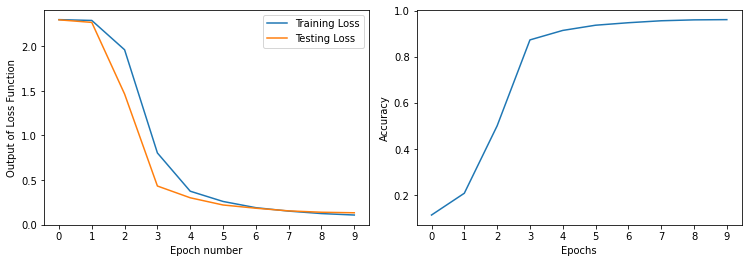

In [33]:
model_plot(epochs, array_of_training_loss_mn3, array_test_loss_mn3, array_test_acc_mn3)

# Skip connections - Type 3 - Dense Skip Connections 
In this type the first 3 hidden layers are skipped.

As a part of Q3 and Q4 we want to do this


In [34]:
model_mn4 = SkipConnectedDeepNeuralNetwork3(784)
learning_rate = 1e-3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_mn4.parameters(), lr=learning_rate, momentum=0.9)
array_test_loss_mn4 = [] #test_loss_array
array_of_training_loss_mn4 = [] #training_loss_array
array_test_acc_mn4 = [] #test_acc_array
epochs = 5
print(model_mn4)

SkipConnectedDeepNeuralNetwork3(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=10, bias=True)
)


In [35]:
array_of_training_loss_mn4, array_test_loss_mn4, array_test_acc_mn4 = train_network(model_mn4, epochs, loss_fn, optimizer, array_of_training_loss_mn4, array_test_loss_mn4, array_test_acc_mn4)

Epoch 1

Training loss = 2.622901  [    0/60000]
Training loss = 0.389942  [ 6400/60000]
Training loss = 0.254643  [12800/60000]
Training loss = 0.185602  [19200/60000]
Training loss = 0.089381  [25600/60000]
Training loss = 0.244771  [32000/60000]
Training loss = 0.134183  [38400/60000]
Training loss = 0.235994  [44800/60000]
Training loss = 0.111991  [51200/60000]
Training loss = 0.248569  [57600/60000]
Testing set: 
 Accuracy: 95.1%, Average loss: 0.160260 

Epoch 2

Training loss = 0.056752  [    0/60000]
Training loss = 0.158968  [ 6400/60000]
Training loss = 0.162756  [12800/60000]
Training loss = 0.088001  [19200/60000]
Training loss = 0.169728  [25600/60000]
Training loss = 0.117174  [32000/60000]
Training loss = 0.098838  [38400/60000]
Training loss = 0.081651  [44800/60000]
Training loss = 0.185669  [51200/60000]
Training loss = 0.062532  [57600/60000]
Testing set: 
 Accuracy: 96.6%, Average loss: 0.116724 

Epoch 3

Training loss = 0.079554  [    0/60000]
Training loss = 0.1

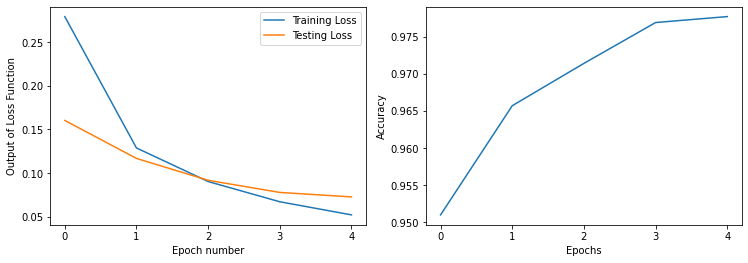

In [36]:
model_plot(epochs, array_of_training_loss_mn4, array_test_loss_mn4, array_test_acc_mn4)

# Comparison of different types networks

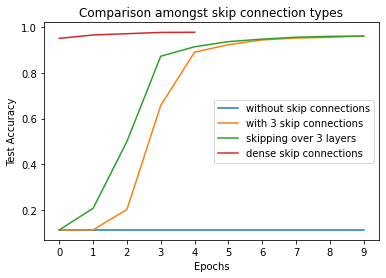

In [37]:
plt.plot(array_test_acc_mn, label = "Test Accuracy without skip connections")
plt.plot(array_test_acc_mn2, label = "Test Accuracy with 3 skip connections")
plt.plot(array_test_acc_mn3, label = "Test Accuracy with two 3-layer skip connections")
plt.plot(array_test_acc_mn4, label = "Test Accuracy with dense skip connections")
plt.xticks(range(0,10))
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy")
plt.title("Comparison amongst skip connection types")
plt.legend(["without skip connections", "with 3 skip connections", "skipping over 3 layers", "dense skip connections"], loc ="best")

Even in this dataset the conclusions for skip connections is the same as previous one i.e. 

Our conclusions are straightforward from our results: 

1: Skip Connections help solve vanishing gradient issue

2: Skip connections can reach optimal accuracy faster as in the backpropagation processs errors are passed back faster

3: An optimal number of hidden layers must be skipped and need not be always 1 or n

When will it hurt?? 

Well we have a feeling that when the data is noisy skip connections are bad to use. I cannot demonstrate noise using this dataset but can visualise what might happen along with the skip connections. 

**Overall skip connections are agathokakological**, though we are panglossian about the same.